In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv(r"C:\Users\sucha\OneDrive\Desktop\PROJECTS\EDA AND ML PROJECTS\Laptop price pred\laptop.csv")

In [4]:
df1 = df.copy()

Check for null values

In [5]:
df.isnull().sum()

Unnamed: 0.1         0
Unnamed: 0          30
Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

In [6]:
df.dropna(inplace=True)

Check and remove duplicate values

In [7]:
df.drop_duplicates(inplace=True)

Remove unnecessery column

In [8]:
df.drop(columns=['Unnamed: 0.1','Unnamed: 0'],inplace=True)

In [9]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [10]:
df.replace(['?','na','N/A'," ","--","-"],np.nan,inplace=True)

In [11]:
df.isna().sum()

Company             0
TypeName            0
Inches              1
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              1
Gpu                 0
OpSys               0
Weight              1
Price               0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1272 non-null   object 
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   object 
 6   Memory            1272 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1272 non-null   object 
 10  Price             1273 non-null   float64
dtypes: float64(1), object(10)
memory usage: 119.3+ KB


<Axes: >

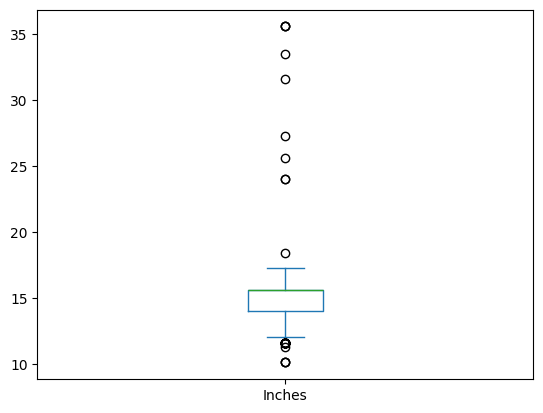

In [13]:
df['Inches'].astype(float).plot(kind='box')

In [14]:
df['Inches']=df['Inches'].astype('Float64')

In [15]:
df['Inches']=df.groupby(['Company','TypeName'])['Inches'].transform(lambda x: x.fillna(x.median()))

In [16]:
df['Memory']=df.groupby(['Company','TypeName','Ram'])['Memory'].transform(lambda x:x.fillna(x.mode().iloc[0]) if not x.mode().empty else x)

In [17]:
df['Weight']=df.groupby(['Company','TypeName','Ram'])['Weight'].transform(lambda x:x.fillna(x.mode().iloc[0]) if not x.mode().empty else x)

In [18]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                495
1366x768                                         274
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         52
Full HD / Touchscreen 1920x1080                   45
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  14
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160                9
IPS Panel 1366x768                                 7
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              6
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Touchscreen 2560x14

In [19]:
df.isna().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [20]:
df['Memory']=df['Memory'].astype(str).replace(r'\.0','',regex=True)

In [21]:
df['Memory']=df['Memory'].astype(str).replace(r'\.0','',regex=True)
df['Memory']=df['Memory'].str.replace('GB','')
df['Memory']=df['Memory'].str.replace('TB','000')

a=df['Memory'].str.split('+',n=1,expand=True)
df['first']=a[0]
df['first']=df['first'].str.strip()

df['Second']=a[1]
df['Second']=df['Second'].str.strip()

df['Layer1HDD']=df['first'].apply(lambda x:1 if 'HDD' in x else 0)
df['Layer1SSD']=df['first'].apply(lambda x:1 if 'SSD' in x else 0)
df['Layer1Hybrid']=df['first'].apply(lambda x:1 if 'Hybrid' in x else 0)
df['Layer1Flash_Storage']=df['first'].apply(lambda x:1 if 'Flash_Storage' in x else 0)

df['first']=df['first'].str.replace(r'\D','',regex=True)

df['Second']=df['Second'].fillna('0')

df['Layer2HDD']=df['Second'].apply(lambda x:1 if 'HDD' in x else 0)
df['Layer2SSD']=df['Second'].apply(lambda x:1 if 'SSD' in x else 0)
df['Layer2Hybrid']=df['Second'].apply(lambda x:1 if 'Hybrid' in x else 0)
df['Layer2Flash_Storage']=df['Second'].apply(lambda x:1 if 'Flash_Storage' in x else 0)

df['Second']=df['Second'].str.replace(r'\D','',regex=True)

df['first']=df['first'].astype(int)
df['Second']=df['Second'].astype(int)

df['HDD']=(df['first']*df['Layer1HDD'])+(df['Second']*df['Layer2HDD'])
df['SSD']=(df['first']*df['Layer1SSD'])+(df['Second']*df['Layer2SSD'])
df['Hybrid']=(df['first']*df['Layer1Hybrid'])+(df['Second']*df['Layer2Hybrid'])
df['Flash_Storage']=(df['first']*df['Layer1Flash_Storage'])+(df['Second']*df['Layer2Flash_Storage'])

df.drop(columns=['first','Second','Layer1HDD','Layer1SSD','Layer1Hybrid','Layer1Flash_Storage','Layer2HDD','Layer2SSD','Layer2Hybrid','Layer2Flash_Storage'],inplace=True)


In [22]:
df['Memory']=df['Memory'].astype(str).replace(r'\.0','',regex=True)
df['Memory']=df['Memory'].str.replace('GB','')
df['Memory']=df['Memory'].str.replace('TB','000')

a=df['Memory'].str.split('+',n=1,expand=True)
df['first']=a[0]
df['first']=df['first'].str.strip()

df['Second']=a[1]
df['Second']=df['Second'].str.strip()


df['Layer1Flash_Storage']=df['first'].apply(lambda x:1 if 'Flash Storage' in x else 0)

df['first']=df['first'].str.replace(r'\D','',regex=True)

df['Second']=df['Second'].fillna('0')

df['Layer2Flash_Storage']=df['Second'].apply(lambda x:1 if 'Flash Storage' in x else 0)

df['Second']=df['Second'].str.replace(r'\D','',regex=True)

df['first']=df['first'].astype(int)
df['Second']=df['Second'].astype(int)

df['Flash_Storage']=(df['first']*df['Layer1Flash_Storage'])+(df['Second']*df['Layer2Flash_Storage'])

df.drop(columns=['first','Second','Layer1Flash_Storage','Layer2Flash_Storage'],inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   Float64
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   object 
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   object 
 10  Price             1273 non-null   float64
 11  HDD               1273 non-null   int64  
 12  SSD               1273 non-null   int64  
 13  Hybrid            1273 non-null   int64  
 14  Flash_Storage     1273 non-null   int64  
dtypes: Float64(1), float64(1), int64(4), object(9)
memory usage: 160.4+ KB


In [24]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                495
1366x768                                         274
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         52
Full HD / Touchscreen 1920x1080                   45
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  14
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160                9
IPS Panel 1366x768                                 7
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              6
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Touchscreen 2560x14

In [25]:
df['Touchscreen']=df['ScreenResolution'].str.contains('Touchscreen',case=False).astype(int)
df['IPS']=df['ScreenResolution'].str.contains('IPS',case=False).astype(int)

In [26]:
df['X_resolution']=df['ScreenResolution'].str.split("x",n=1,expand=True)[0]
df['X_resolution'].head()
df['X_resolution']=df['X_resolution'].copy()

In [27]:
df['Y_resolution']=df['ScreenResolution'].str.split("x",n=1,expand=True)[1].astype(int)

In [28]:
df['X_resolution']=df['X_resolution'].str.extract(r'(\d+\.?\d+)').astype(int)

In [29]:
df.select_dtypes(exclude='object').corr()['Price']

Inches           0.044966
Price            1.000000
HDD             -0.094825
SSD              0.668716
Hybrid           0.007843
Flash_Storage   -0.038332
Touchscreen      0.188994
IPS              0.254851
X_resolution     0.557556
Y_resolution     0.554069
Name: Price, dtype: float64

In [30]:
df['Total_pixels']=df['X_resolution']*df['Y_resolution']
df['Aspect_ratio']=df['X_resolution']/df['Y_resolution']
df['PPI']=((df['X_resolution']**2+df['Y_resolution']**2)*0.05)/df['Inches']

In [31]:
df.select_dtypes(exclude='object').corr()['Price']

Inches           0.044966
Price            1.000000
HDD             -0.094825
SSD              0.668716
Hybrid           0.007843
Flash_Storage   -0.038332
Touchscreen      0.188994
IPS              0.254851
X_resolution     0.557556
Y_resolution     0.554069
Total_pixels     0.516728
Aspect_ratio    -0.075894
PPI              0.478387
Name: Price, dtype: float64

In [32]:
df.drop(columns=['Inches','X_resolution','Y_resolution','ScreenResolution'],inplace=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1273 non-null   object 
 1   TypeName       1273 non-null   object 
 2   Cpu            1273 non-null   object 
 3   Ram            1273 non-null   object 
 4   Memory         1273 non-null   object 
 5   Gpu            1273 non-null   object 
 6   OpSys          1273 non-null   object 
 7   Weight         1273 non-null   object 
 8   Price          1273 non-null   float64
 9   HDD            1273 non-null   int64  
 10  SSD            1273 non-null   int64  
 11  Hybrid         1273 non-null   int64  
 12  Flash_Storage  1273 non-null   int64  
 13  Touchscreen    1273 non-null   int64  
 14  IPS            1273 non-null   int64  
 15  Total_pixels   1273 non-null   int64  
 16  Aspect_ratio   1273 non-null   float64
 17  PPI            1273 non-null   Float64
dtypes: Float64(1)

In [34]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       183
Intel Core i7 7700HQ 2.8GHz      142
Intel Core i7 7500U 2.7GHz       128
Intel Core i7 8550U 1.8GHz        72
Intel Core i5 8250U 1.6GHz        68
                                ... 
Intel Core i5 7200U 2.70GHz        1
Intel Core M M7-6Y75 1.2GHz        1
Intel Core M 6Y54 1.1GHz           1
AMD E-Series 9000 2.2GHz           1
Samsung Cortex A72&A53 2.0GHz      1
Name: count, Length: 118, dtype: int64

In [35]:
df['Cpu_name']=df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [36]:
def fetch_processor(text):
    if text == 'Intel Core i3' or text == 'Intel Core i5' or text == 'Intel Core i7':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [37]:
df['Cpu_Brand'] = df['Cpu_name'].apply(fetch_processor)

<Axes: xlabel='Cpu_Brand'>

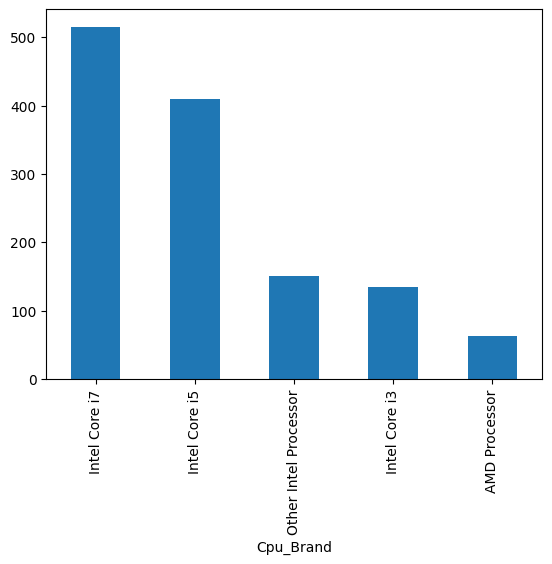

In [38]:
df['Cpu_Brand'].value_counts().plot(kind='bar')

In [39]:
df.drop(columns=['Cpu','Cpu_name'],inplace=True)

In [40]:
df['Flash_Storage'].value_counts()  

Flash_Storage
0      1200
32       37
64       15
256       8
16        7
128       4
512       2
Name: count, dtype: int64

<Axes: xlabel='HDD'>

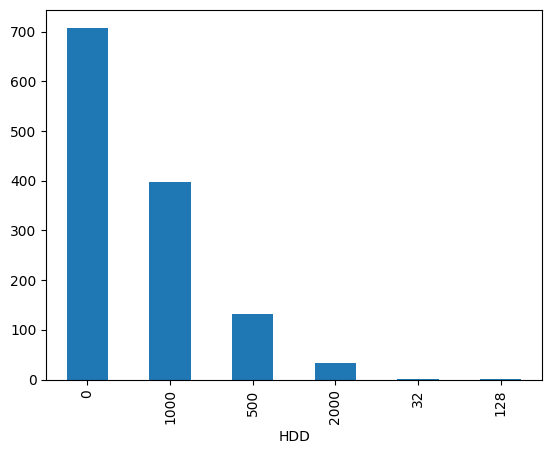

In [41]:
df['HDD'].value_counts().plot(kind='bar')

In [42]:
df.select_dtypes(exclude='object').corr()['Price']

Price            1.000000
HDD             -0.094825
SSD              0.668716
Hybrid           0.007843
Flash_Storage   -0.038332
Touchscreen      0.188994
IPS              0.254851
Total_pixels     0.516728
Aspect_ratio    -0.075894
PPI              0.478387
Name: Price, dtype: float64

In [43]:
df['Aspect_ratio'].value_counts()

Aspect_ratio
1.777778    935
1.778646    301
1.600000     24
1.500000     13
Name: count, dtype: int64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1273 non-null   object 
 1   TypeName       1273 non-null   object 
 2   Ram            1273 non-null   object 
 3   Memory         1273 non-null   object 
 4   Gpu            1273 non-null   object 
 5   OpSys          1273 non-null   object 
 6   Weight         1273 non-null   object 
 7   Price          1273 non-null   float64
 8   HDD            1273 non-null   int64  
 9   SSD            1273 non-null   int64  
 10  Hybrid         1273 non-null   int64  
 11  Flash_Storage  1273 non-null   int64  
 12  Touchscreen    1273 non-null   int64  
 13  IPS            1273 non-null   int64  
 14  Total_pixels   1273 non-null   int64  
 15  Aspect_ratio   1273 non-null   float64
 16  PPI            1273 non-null   Float64
 17  Cpu_Brand      1273 non-null   object 
dtypes: Float64(1)

In [45]:
print(df.columns.tolist())

['Company', 'TypeName', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price', 'HDD', 'SSD', 'Hybrid', 'Flash_Storage', 'Touchscreen', 'IPS', 'Total_pixels', 'Aspect_ratio', 'PPI', 'Cpu_Brand']


In [46]:
df.drop(columns=['Hybrid','Flash_Storage','Memory'],inplace=True)

In [47]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,HDD,SSD,Touchscreen,IPS,Total_pixels,Aspect_ratio,PPI,Cpu_Brand
0,Apple,Ultrabook,8GB,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,128,0,1,4096000,1.600000,34261.654135,Intel Core i5
1,Apple,Ultrabook,8GB,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,0,0,1296000,1.600000,10840.601504,Intel Core i5
2,HP,Notebook,8GB,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,256,0,0,2073600,1.777778,15553.846154,Intel Core i5
3,Apple,Ultrabook,16GB,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,512,0,1,5184000,1.600000,37449.350649,Intel Core i7
4,Apple,Ultrabook,8GB,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,256,0,1,4096000,1.600000,34261.654135,Intel Core i5


In [48]:
df['Ram'].value_counts()

Ram
8GB     601
4GB     367
16GB    194
6GB      40
12GB     25
2GB      22
32GB     17
64GB      3
24GB      3
1GB       1
Name: count, dtype: int64

In [49]:
df['Ram']=df['Ram'].str.replace('GB','',regex=False)
df['Ram']=df['Ram'].str.strip()
df['Ram']=df['Ram'].astype(int)

In [50]:
df['Gpu']=df['Gpu'].apply(lambda x:x.split()[0])

In [51]:
df['Gpu'].value_counts()

Gpu
Intel     703
Nvidia    393
AMD       176
ARM         1
Name: count, dtype: int64

In [52]:
df=df[df['Gpu'] != 'ARM']

In [53]:
df['OpSys'].value_counts()

OpSys
Windows 10      1047
No OS             63
Linux             61
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            1
Name: count, dtype: int64

In [54]:
def cat_oop(inp):
    if inp =='Windows 10' or inp=='Windows 7' or inp=='Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp=='Mac OS X':
        return 'Mac'
    else:
        return 'Others/Lunux/No OS'

In [55]:
df['OpSys']=df['OpSys'].apply(cat_oop)

In [56]:
df['OpSys'].value_counts()

OpSys
Windows               1100
Others/Lunux/No OS     151
Mac                     21
Name: count, dtype: int64

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1272 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       1272 non-null   object 
 1   TypeName      1272 non-null   object 
 2   Ram           1272 non-null   int64  
 3   Gpu           1272 non-null   object 
 4   OpSys         1272 non-null   object 
 5   Weight        1272 non-null   object 
 6   Price         1272 non-null   float64
 7   HDD           1272 non-null   int64  
 8   SSD           1272 non-null   int64  
 9   Touchscreen   1272 non-null   int64  
 10  IPS           1272 non-null   int64  
 11  Total_pixels  1272 non-null   int64  
 12  Aspect_ratio  1272 non-null   float64
 13  PPI           1272 non-null   Float64
 14  Cpu_Brand     1272 non-null   object 
dtypes: Float64(1), float64(2), int64(6), object(6)
memory usage: 160.2+ KB


<Axes: >

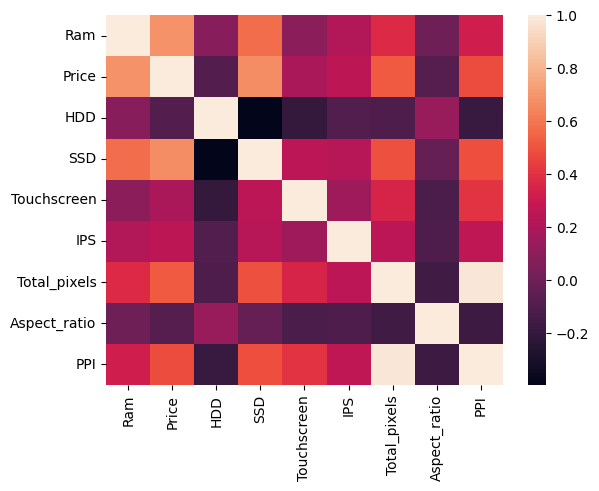

In [58]:
sns.heatmap(df.select_dtypes(exclude='object').corr())

In [59]:
df['Weight'].value_counts()

Weight
2.2kg      111
2.1kg       57
2.4kg       43
2.3kg       41
2.5kg       37
          ... 
3.52kg       1
2.21kg       1
2.191kg      1
2.34kg       1
4.0kg        1
Name: count, Length: 188, dtype: int64

In [60]:
df['Weight']=df['Weight'].str.replace('kg','').str.strip()
df['Weight'].astype(float)

0       1.37
1       1.34
2       1.86
3       1.83
4       1.37
        ... 
1298    1.80
1299    1.30
1300    1.50
1301    2.19
1302    2.20
Name: Weight, Length: 1272, dtype: float64

In [61]:
df['Weight'].value_counts()

Weight
2.2      111
2.1       57
2.4       43
2.3       41
2.5       37
        ... 
3.52       1
2.21       1
2.191      1
2.34       1
4.0        1
Name: count, Length: 188, dtype: int64

C:\Users\sucha\AppData\Local\Temp\ipykernel_16108\834922981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

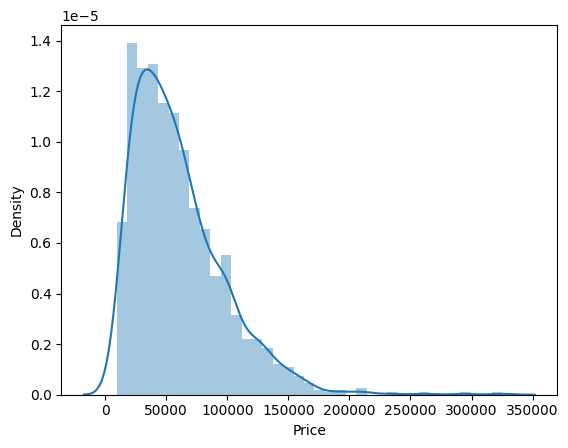

In [62]:
sns.distplot(df['Price'])

C:\Users\sucha\AppData\Local\Temp\ipykernel_16108\3858691759.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  (sns.distplot(np.log(df['Price'])))


<Axes: xlabel='Price', ylabel='Density'>

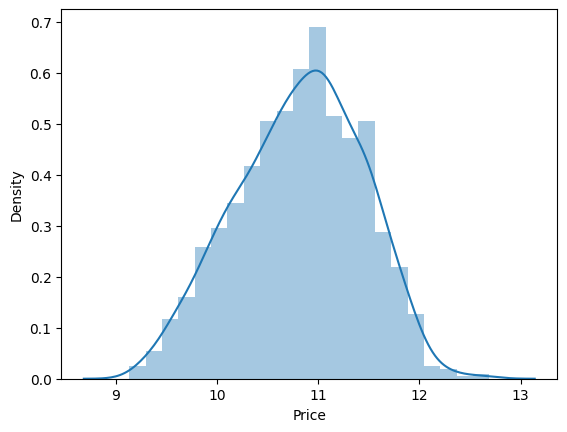

In [63]:
(sns.distplot(np.log(df['Price'])))

In [64]:
X = df.drop(columns=['Price'])
y =  np.log(df['Price'])

In [65]:
X

,Company,TypeName,Ram,Gpu,OpSys,Weight,HDD,SSD,Touchscreen,IPS,Total_pixels,Aspect_ratio,PPI,Cpu_Brand
0,Apple,Ultrabook,8,Intel,Mac,1.37,0,128,0,1,4096000,1.600000,34261.654135,Intel Core i5
1,Apple,Ultrabook,8,Intel,Mac,1.34,0,0,0,0,1296000,1.600000,10840.601504,Intel Core i5
2,HP,Notebook,8,Intel,Others/Lunux/No OS,1.86,0,256,0,0,2073600,1.777778,15553.846154,Intel Core i5
3,Apple,Ultrabook,16,AMD,Mac,1.83,0,512,0,1,5184000,1.600000,37449.350649,Intel Core i7
4,Apple,Ultrabook,8,Intel,Mac,1.37,0,256,0,1,4096000,1.600000,34261.654135,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Intel,Windows,1.8,0,128,1,1,2073600,1.777778,17331.428571,Intel Core i7
1299,Lenovo,2 in 1 Convertible,16,Intel,Windows,1.3,0,512,1,1,5760000,1.777778,50676.691729,Intel Core i7
1300,Lenovo,Notebook,2,Intel,Windows,1.5,0,0,0,0,1049088,1.778646,8770.642857,Other Intel Processor
1301,HP,Notebook,6,AMD,Windows,2.19,1000,0,0,0,1049088,1.778646,7871.089744,Intel Core i7


In [121]:
df['OpSys'].value_counts()

OpSys
Windows               1100
Others/Lunux/No OS     151
Mac                     21
Name: count, dtype: int64

In [66]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1272, dtype: float64

In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=40)


In [68]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [69]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [70]:
cat_col =['Company','TypeName','Gpu','OpSys','Cpu_Brand']
num_col=['Ram','Weight','HDD','SSD','Touchscreen','IPS','Total_pixels','Aspect_ratio','PPI']

In [71]:
ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(drop='first'),cat_col),
        ('scaler', StandardScaler(),num_col)
    ],
    remainder='passthrough'   # keep all other columns
)

In [72]:
pipe = Pipeline(steps=[('Preprocessor',ct),('model',RandomForestRegressor(n_estimators=100,random_state=3,max_samples=0.6,max_features=0.75,max_depth=15))])

In [73]:
pipe.fit(X_train,y_train)

,steps,"[('Preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('encoder', ...), ('scaler', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [99]:
def adjusted_r2(y_test, y_pred, n_features=X_test.shape[1]):
    n =  len(y_test)
    r2 = r2_score(y_test,y_pred)
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - n_features - 1)
    return adj_r2



In [104]:
y_pred=pipe.predict(X_test)

mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)

print('R2 score',r2_score(y_test,y_pred))
print('adjusted r2_score',adjusted_r2(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mse)
print('RMSE',rmse)

R2 score 0.8340951484353699
adjusted r2_score 0.8208981716063652
MAE 0.17875899710020132
MSE 0.05843766612460468
RMSE 0.2417388386763796


# Linear regression

In [75]:
pipe = Pipeline(steps=[('Preprocessor',ct),('model',LinearRegression())])

In [76]:
pipe.fit(X_train,y_train)

,steps,"[('Preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('encoder', ...), ('scaler', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [105]:
y_pred=pipe.predict(X_test)

mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)

print('R2 score',r2_score(y_test,y_pred))
print('adjusted r2_score',adjusted_r2(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mse)
print('RMSE',rmse)

R2 score 0.8340951484353699
adjusted r2_score 0.8208981716063652
MAE 0.17875899710020132
MSE 0.05843766612460468
RMSE 0.2417388386763796


# Ridge Regression

In [106]:
pipe = Pipeline(steps=[('Preprocessor',ct),('model',Ridge(alpha=10))])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)

print('R2 score',r2_score(y_test,y_pred))
print('adjusted r2_score',adjusted_r2(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mse)
print('RMSE',rmse)

R2 score 0.7811057050328172
adjusted r2_score 0.7636936588422458
MAE 0.21565509237419328
MSE 0.07710245725327584
RMSE 0.27767329229379595


# Lasso Regression

In [107]:
pipe=Pipeline(steps=[('Preprocessor',ct),('model',Lasso(alpha=0.00001))])

pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)

print('R2 score',r2_score(y_test,y_pred))
print('adjusted r2_score',adjusted_r2(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mse)
print('RMSE',rmse)


R2 score 0.7780389258292661
adjusted r2_score 0.7603829312929578
MAE 0.21425435092477094
MSE 0.07818268738208063
RMSE 0.2796116724710909


# KNN

In [108]:
pipe=Pipeline(steps=[('Preprocessor',ct),('model',KNeighborsRegressor(n_neighbors=3))])

pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)

print('R2 score',r2_score(y_test,y_pred))
print('adjusted r2_score',adjusted_r2(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mse)
print('RMSE',rmse)

R2 score 0.7999287129240585
adjusted r2_score 0.7840139514521087
MAE 0.20266844383805888
MSE 0.07047231569782737
RMSE 0.265466223271111


# Decision Tree Regression

In [109]:
pipe=Pipeline(steps=[('Preprocessor',ct),('model',DecisionTreeRegressor(max_depth=9))])

pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)

print('R2 score',r2_score(y_test,y_pred))
print('adjusted r2_score',adjusted_r2(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mse)
print('RMSE',rmse)

R2 score 0.820450240577813
adjusted r2_score 0.8061678733510481
MAE 0.19265680579860237
MSE 0.06324389428587264
RMSE 0.251483387693646


# SVM

In [110]:
pipe=Pipeline(steps=[('Preprocessor',ct),('model',SVR(kernel='rbf',C=20000,epsilon=0.2))])

pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)

print('R2 score',r2_score(y_test,y_pred))
print('adjusted r2_score',adjusted_r2(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mse)
print('RMSE',rmse)

R2 score 0.7423474722172583
adjusted r2_score 0.7218523847799947
MAE 0.22367292180590273
MSE 0.09075450327540797
RMSE 0.3012548809154932


# Extra trees

In [111]:
pipe=Pipeline(steps=[('Preprocessor',ct),('model',ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=None,max_features=0.75,max_depth=15))])

pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)

print('R2 score',r2_score(y_test,y_pred))
print('adjusted r2_score',adjusted_r2(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mse)
print('RMSE',rmse)

R2 score 0.8358666234246046
adjusted r2_score 0.8228105593788345
MAE 0.17787930640811248
MSE 0.05781368880873543
RMSE 0.24044477288711316


# Ada Boost

In [112]:
pipe=Pipeline(steps=[('Preprocessor',ct),('model',AdaBoostRegressor(n_estimators=15,learning_rate=1.0))])

pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)

print('R2 score',r2_score(y_test,y_pred))
print('adjusted r2_score',adjusted_r2(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mse)
print('RMSE',rmse)

R2 score 0.7894922615713926
adjusted r2_score 0.7727473278327535
MAE 0.22114864719089006
MSE 0.07414840988025206
RMSE 0.27230205632762317


# Gradient Boost

In [113]:
pipe=Pipeline(steps=[('Preprocessor',ct),('model',GradientBoostingRegressor(n_estimators=500))])

pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)

print('R2 score',r2_score(y_test,y_pred))
print('adjusted r2_score',adjusted_r2(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mse)
print('RMSE',rmse)

R2 score 0.8605443170086408
adjusted r2_score 0.8494512513161463
MAE 0.1634970561967528
MSE 0.049121316013191155
RMSE 0.22163329175282118


# XG boost

In [114]:
pipe=Pipeline(steps=[('Preprocessor',ct),('model',XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5))])

pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)

print('R2 score',r2_score(y_test,y_pred))
print('adjusted r2_score',adjusted_r2(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mse)
print('RMSE',rmse)

R2 score 0.8340951484353699
adjusted r2_score 0.8208981716063652
MAE 0.17875899710020132
MSE 0.05843766612460468
RMSE 0.2417388386763796


# Consolidate the results

In [116]:
results = {
   "Random Forest Regression": {'R2 score': 0.8340, 'adjusted r2_score': 0.8208, 'MAE': 0.1787, 'MSE': 0.0584, 'RMSE': 0.2417},
   "Linear Regression": {'R2 score': 0.8340, 'adjusted r2_score': 0.8208, 'MAE': 0.1787, 'MSE': 0.0584, 'RMSE': 0.2417},
   "Ridge Regression": {'R2 score': 0.7811, 'adjusted r2_score': 0.7636, 'MAE': 0.2156, 'MSE': 0.0771, 'RMSE': 0.2776},
   "Lasso Regression": {'R2 score': 0.7780, 'adjusted r2_score': 0.7603, 'MAE': 0.2142, 'MSE': 0.0781, 'RMSE': 0.2796},
   "KNN Regression": {'R2 score': 0.7999, 'adjusted r2_score': 0.7840, 'MAE': 0.2026, 'MSE': 0.0704, 'RMSE': 0.2654},
   "Decision Tree Regression": {'R2 score': 0.8204, 'adjusted r2_score': 0.8061, 'MAE': 0.1926, 'MSE': 0.0632, 'RMSE': 0.2514},
   "Support Vector Machine Regression": {'R2 score': 0.7423, 'adjusted r2_score': 0.7218, 'MAE': 0.2236, 'MSE': 0.0907, 'RMSE': 0.3012},
   "Extra Trees Regression": {'R2 score': 0.8358, 'adjusted r2_score': 0.8228, 'MAE': 0.1778, 'MSE': 0.0578, 'RMSE': 0.2404},
   "Ada Boost Regression": {'R2 score': 0.7894, 'adjusted r2_score': 0.7727, 'MAE': 0.2211, 'MSE': 0.0741, 'RMSE': 0.2723},
   "Gradient Boost Regression": {'R2 score': 0.8605, 'adjusted r2_score': 0.8494, 'MAE': 0.1634, 'MSE': 0.0491, 'RMSE': 0.2216},
   "XG Boost Regression": {'R2 score': 0.8340, 'adjusted r2_score': 0.8208, 'MAE': 0.1787, 'MSE': 0.0584, 'RMSE': 0.2417}
}

In [119]:
df_final_result = pd.DataFrame(results).T

In [120]:
print(df_final_result)

                                   R2 score  adjusted r2_score     MAE  \
Random Forest Regression             0.8340             0.8208  0.1787   
Linear Regression                    0.8340             0.8208  0.1787   
Ridge Regression                     0.7811             0.7636  0.2156   
Lasso Regression                     0.7780             0.7603  0.2142   
KNN Regression                       0.7999             0.7840  0.2026   
Decision Tree Regression             0.8204             0.8061  0.1926   
Support Vector Machine Regression    0.7423             0.7218  0.2236   
Extra Trees Regression               0.8358             0.8228  0.1778   
Ada Boost Regression                 0.7894             0.7727  0.2211   
Gradient Boost Regression            0.8605             0.8494  0.1634   
XG Boost Regression                  0.8340             0.8208  0.1787   

                                      MSE    RMSE  
Random Forest Regression           0.0584  0.2417  
Linear 